In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

print(os.listdir('../input'))


['sample_submission.csv', 'test.csv.zip', 'train.csv.zip', 'labels.csv.zip', 'train.csv', 'test.csv', 'labels.csv', 'description.md', 'GCP-Coupons-Instructions.rtf', 'sample_submission.csv.zip', 'new-york-city-taxi-fare-prediction']


In [3]:
train_df =  pd.read_csv('../input/train.csv', nrows = 10_000_000)
test_df=pd.read_csv('../input/test.csv')
train_df.dtypes


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
test_df=pd.read_csv('../input/test.csv')
test_df.head()


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-10-01 21:26:11.0000001,2010-10-01 21:26:11 UTC,-73.983130,40.761970,-73.994386,40.749236,1
1,2013-10-06 01:38:00.00000083,2013-10-06 01:38:00 UTC,-73.948505,40.753977,-73.808195,40.731952,2
2,2012-03-30 19:13:53.0000001,2012-03-30 19:13:53 UTC,-73.973964,40.791979,-73.979018,40.785544,1
3,2012-02-08 02:57:23.0000001,2012-02-08 02:57:23 UTC,-73.991478,40.738907,-73.907198,40.861572,2
4,2013-12-13 22:56:00.000000237,2013-12-13 22:56:00 UTC,-73.986281,40.740067,-73.933927,40.856781,2


In [5]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['Difference_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['Difference_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)
add_travel_vector_features(test_df)


In [6]:
print(train_df.isnull().sum())


key                      0
fare_amount              0
pickup_datetime          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude       69
dropoff_latitude        69
passenger_count          0
Difference_longitude    69
Difference_latitude     69
dtype: int64


In [7]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))


Old size: 10000000
New size: 9999931


KeyError: 'abs_diff_longitude'

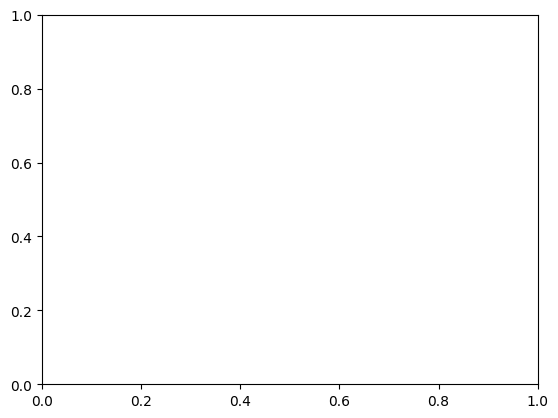

In [8]:
plot = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')


In [9]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.Difference_longitude  5.0) & (train_df.Difference_latitude  5.0)]
print('New size: %d' % len(train_df))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2785167700.py, line 2)

In [10]:
ls1=list(train_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-7:]
train_df['pickuptime']=ls1    



ls1=list(test_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-7:]
test_df['pickuptime']=ls1  


In [11]:
ls1=list(train_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:-4:]
    ls1[i]=pd.Timestamp(ls1[i])
    ls1[i]=ls1[i].weekday()
train_df['Weekday']=ls1


ls1=list(test_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:-4:]
    ls1[i]=pd.Timestamp(ls1[i])
    ls1[i]=ls1[i].weekday()
test_df['Weekday']=ls1


In [12]:
# train_df.head()
test_df.head()


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Weekday
0,2010-10-01 21:26:11.0000001,2010-10-01 21:26:11 UTC,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,21:26,4
1,2013-10-06 01:38:00.00000083,2013-10-06 01:38:00 UTC,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,01:38,6
2,2012-03-30 19:13:53.0000001,2012-03-30 19:13:53 UTC,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,19:13,4
3,2012-02-08 02:57:23.0000001,2012-02-08 02:57:23 UTC,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,02:57,2
4,2013-12-13 22:56:00.000000237,2013-12-13 22:56:00 UTC,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,22:56,4


In [13]:
train_df.drop('pickup_datetime',inplace=True,axis=1)
test_df.drop('pickup_datetime',inplace=True,axis=1)


In [14]:
train_df['Weekday'].replace(to_replace=[i for i in range(0,7)],
                            value=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                              inplace=True)
test_df['Weekday'].replace(to_replace=[i for i in range(0,7)],
                              value=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                              inplace=True)


/tmp/ipykernel_8/895437141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weekday'].replace(to_replace=[i for i in range(0,7)],
/tmp/ipykernel_8/895437141.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [15]:
train_df.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Weekday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26,Monday
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52,Tuesday
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35,Thursday
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30,Saturday
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51,Tuesday


In [16]:
test_df.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Weekday
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,21:26,Friday
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,01:38,Sunday
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,19:13,Friday
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,02:57,Wednesday
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,22:56,Friday


In [17]:
train_one_hot=pd.get_dummies(train_df['Weekday'])
test_one_hot=pd.get_dummies(test_df['Weekday'])
train_df=pd.concat([train_df,train_one_hot],axis=1)
test_df=pd.concat([test_df,test_one_hot],axis=1)


In [18]:
train_df.drop('Weekday',axis=1,inplace=True)
test_df.drop('Weekday',axis=1,inplace=True)


In [19]:
ls1=list(train_df['pickuptime'])
for i in range(len(ls1)):
    z=ls1[i].split(':')
    ls1[i]=int(z[0])*100+int(z[1])
train_df['pickuptime']=ls1


ls1=list(test_df['pickuptime'])
for i in range(len(ls1)):
    z=ls1[i].split(':')
    ls1[i]=int(z[0])*100+int(z[1])
test_df['pickuptime']=ls1


In [20]:
R = 6373.0
lat1 =np.asarray(np.radians(train_df['pickup_latitude']))
lon1 = np.asarray(np.radians(train_df['pickup_longitude']))
lat2 = np.asarray(np.radians(train_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_df['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
ls1=[] 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c

    
train_df['Distance']=np.asarray(distance)*0.621



lat1 =np.asarray(np.radians(test_df['pickup_latitude']))
lon1 = np.asarray(np.radians(test_df['pickup_longitude']))
lat2 = np.asarray(np.radians(test_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_df['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
 
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
test_df['Distance']=np.asarray(distance)*0.621


In [21]:
R = 6373.0
lat1 =np.asarray(np.radians(train_df['pickup_latitude']))
lon1 = np.asarray(np.radians(train_df['pickup_longitude']))
lat2 = np.asarray(np.radians(train_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_df['dropoff_longitude']))

lat3=np.zeros(len(train_df))+np.radians(40.6413111)
lon3=np.zeros(len(train_df))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
train_df['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

train_df['Dropoff_Distance_airport']=np.asarray(distance2)*0.621



lat1 =np.asarray(np.radians(test_df['pickup_latitude']))
lon1 = np.asarray(np.radians(test_df['pickup_longitude']))
lat2 = np.asarray(np.radians(test_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_df['dropoff_longitude']))

lat3=np.zeros(len(test_df))+np.radians(40.6413111)
lon3=np.zeros(len(test_df))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
test_df['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
test_df['Dropoff_Distance_airport']=np.asarray(distance2)*0.621


In [22]:
train_df['Distance']=np.round(train_df['Distance'],2)
train_df['Pickup_Distance_airport']=np.round(train_df['Pickup_Distance_airport'],2)
train_df['Dropoff_Distance_airport']=np.round(train_df['Dropoff_Distance_airport'],2)
test_df['Distance']=np.round(test_df['Distance'],2)
test_df['Pickup_Distance_airport']=np.round(test_df['Pickup_Distance_airport'],2)
test_df['Dropoff_Distance_airport']=np.round(test_df['Dropoff_Distance_airport'],2)


In [23]:
train_df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)
test_df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)


In [24]:
train_df['Difference_latitude']=np.abs(train_df['Difference_latitude']-np.mean(train_df['Difference_latitude']))
train_df['Difference_latitude']=train_df['Difference_latitude']/np.var(train_df['Difference_latitude'])
test_df['Difference_longitude']=np.abs(test_df['Difference_longitude']-np.mean(test_df['Difference_longitude']))
test_df['Difference_longitude']=test_df['Difference_longitude']/np.var(test_df['Difference_longitude'])


In [25]:
from sklearn.model_selection import train_test_split
X=train_df.drop(['key','fare_amount'],axis=1)
y=train_df['fare_amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=80)


In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))


TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [27]:
pred=np.round(lr.predict(test_df.drop('key',axis=1)),2)
# pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv').head()


NameError: name 'lr' is not defined

In [28]:
Submission=pd.DataFrame(data=pred,columns=['fare_amount'])
Submission['key']=test_df['key']
Submission=Submission[['key','fare_amount']]
Submission.set_index('key',inplace=True)
Submission.to_csv('Submission.csv')


NameError: name 'pred' is not defined

In [29]:
df=pd.read_csv('Submission.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'Submission.csv'

In [30]:
df.head()


NameError: name 'df' is not defined